In [26]:
import numpy as np # linear algebra working with arrays
import pandas as pd # csv data handling
import os
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo

# Set notebook mode to work in offline
pyo.init_notebook_mode(connected=True)

In [27]:
data_loc='../data1'
data=pd.read_csv(os.path.join(data_loc,'district_wise_rainfall_normal.csv'))

In [28]:
data.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [29]:
# describing the dataset
print("\n-------Dataset information-------\n")
data.info()
data.shape

print("\n-------Checking for null values-------\n")
print(data.isnull().sum().sort_values(ascending=False))


-------Dataset information-------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep        641

In [30]:
data=data.astype({"STATE_UT_NAME":'category'})
data=data.astype({"DISTRICT":'category'})
#district wise average annual flow of rainfall 

data1_vlr=data[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['STATE_UT_NAME']=='TAMIL NADU']


month=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

data2_vlr=[]
for i in month:
    data2_vlr.append(
        go.Bar(
            x = data1_vlr['DISTRICT'],
            y = data1_vlr[i].values,
            name = i))

layout = go.Layout(barmode = 'stack',width=1000, height=900)
go.Figure(data = data2_vlr, layout = layout).show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# formatting the data in a way that when the ranifall for the last four months were given, the possible flow of rainfall 
# on next consecutive month will get predicted


districtwise_data=np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 
                                'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT','NOV', 'DEC']])

x=None
y=None
for i in range(districtwise_data.shape[1]-4):
    if x is None:
        x = districtwise_data[:, i:i+4]
        y = districtwise_data[:, i+4]
    else:
        x = np.concatenate((x, districtwise_data[:, i:i+4]), axis=0)
        y = np.concatenate((y, districtwise_data[:, i+4]), axis=0)


x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=40)


In [32]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import EarlyStopping

In [33]:
#configuring the neural network model
model=Sequential()
model.add(Dense(100,input_shape=(4,),kernel_initializer='normal',activation='elu'))
model.add(Dense(100,activation='elu'))
model.add(Dense(100,activation='elu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_logarithmic_error',optimizer='adamax',metrics=['mse','mae'] )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 20,801
Trainable params: 20,801
Non-trainable params: 0
_________________________________________________________________


In [34]:
# fitting the data in model
early_stopper=EarlyStopping(patience=4,mode='auto')
model_fit=model.fit(x_train, y_train,batch_size=25,epochs=200,verbose=1,validation_split=0.2,callbacks=[early_stopper])

Epoch 1/200
132/132 [==============================] - 2s 7ms/step - loss: 1.7865 - mse: 29810.1875 - mae: 106.8320 - val_loss: 0.8380 - val_mse: 19238.6621 - val_mae: 86.0932
Epoch 2/200
132/132 [==============================] - 0s 3ms/step - loss: 0.6280 - mse: 14868.3330 - mae: 71.7663 - val_loss: 0.5099 - val_mse: 12214.2451 - val_mae: 66.6943
Epoch 3/200
132/132 [==============================] - 0s 3ms/step - loss: 0.4439 - mse: 10719.3477 - mae: 59.3218 - val_loss: 0.4034 - val_mse: 9544.3418 - val_mae: 58.4122
Epoch 4/200
132/132 [==============================] - 1s 4ms/step - loss: 0.3823 - mse: 9433.5010 - mae: 55.9949 - val_loss: 0.3613 - val_mse: 9035.2559 - val_mae: 57.2163
Epoch 5/200
132/132 [==============================] - 0s 3ms/step - loss: 0.3609 - mse: 9005.8633 - mae: 55.3988 - val_loss: 0.3551 - val_mse: 8720.2676 - val_mae: 56.4880
Epoch 6/200
132/132 [==============================] - 0s 3ms/step - loss: 0.3443 - mse: 8627.8770 - mae: 54.5911 - val_loss: 0.3

In [35]:
y_pred=model.predict(x_test)
print("Mean Absolute error: ",mean_absolute_error(y_test,y_pred))

Mean Absolute error:  42.64668579057411


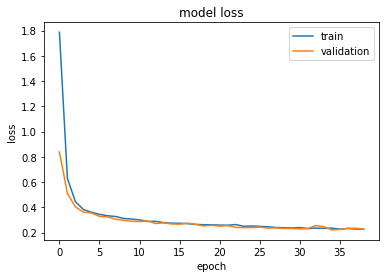

In [36]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

In [37]:
model.save('./model/neuroregress(district)model')

INFO:tensorflow:Assets written to: ./model/neuroregress(district)model\assets
